### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical

### Data Loading

***Loading test-set***

In [4]:
base_dir_test="input/Test"

In [5]:
class_labels=os.listdir(base_dir_test)
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [6]:
test_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_test, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(256,256))
            image=img_to_array(image)
            image=image/255.0
            test_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/Test\Apple___Apple_scab
input/Test\Apple___Black_rot
input/Test\Apple___Cedar_apple_rust
input/Test\Apple___healthy


In [7]:
print(len(test_data))

500


In [8]:
x_test,Y_test =zip(*test_data)

In [9]:
x_test

(array([[[0.91764706, 0.88235295, 0.9490196 ],
         [0.7490196 , 0.7137255 , 0.78039217],
         [0.7176471 , 0.68235296, 0.7490196 ],
         ...,
         [0.13725491, 0.13333334, 0.20392157],
         [0.13725491, 0.13333334, 0.20392157],
         [0.13725491, 0.13333334, 0.20392157]],
 
        [[0.8117647 , 0.7764706 , 0.84313726],
         [0.76862746, 0.73333335, 0.8       ],
         [0.9411765 , 0.90588236, 0.972549  ],
         ...,
         [0.13333334, 0.12941177, 0.2       ],
         [0.13333334, 0.12941177, 0.2       ],
         [0.13333334, 0.12941177, 0.2       ]],
 
        [[0.83137256, 0.79607844, 0.8627451 ],
         [0.8509804 , 0.8156863 , 0.88235295],
         [0.7882353 , 0.7529412 , 0.81960785],
         ...,
         [0.14509805, 0.14117648, 0.21176471],
         [0.14509805, 0.14117648, 0.21176471],
         [0.14117648, 0.13725491, 0.20784314]],
 
        ...,
 
        [[0.11764706, 0.12941177, 0.20392157],
         [0.11764706, 0.12941177, 0.20392

In [10]:
print(Y_test)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

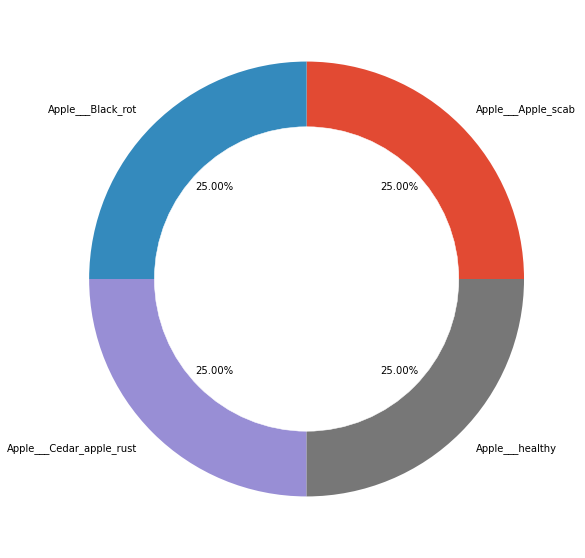

In [11]:
pie_data=[]
for i in range(len(class_labels)):
    pie_data.append(list(Y_test).count(i))
with plt.style.context("ggplot"):
    plt.figure(figsize=(10,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(pie_data, labels=class_labels,autopct='%.2f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

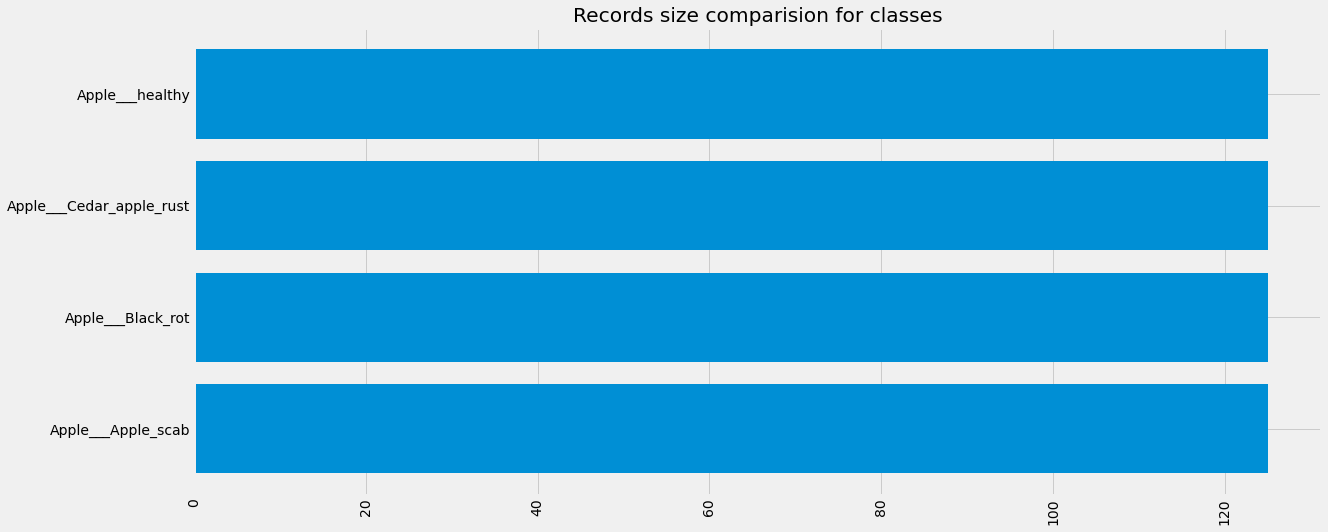

In [12]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.barh(width=pie_data,y=class_labels)
    plt.title(label="Records size comparision for classes")
    plt.xticks(rotation=90)
    plt.show()

In [13]:
X_test=np.array(x_test)
y_test=np.array(Y_test)

In [14]:
print(X_test.shape,y_test.shape)

(500, 256, 256, 3) (500,)


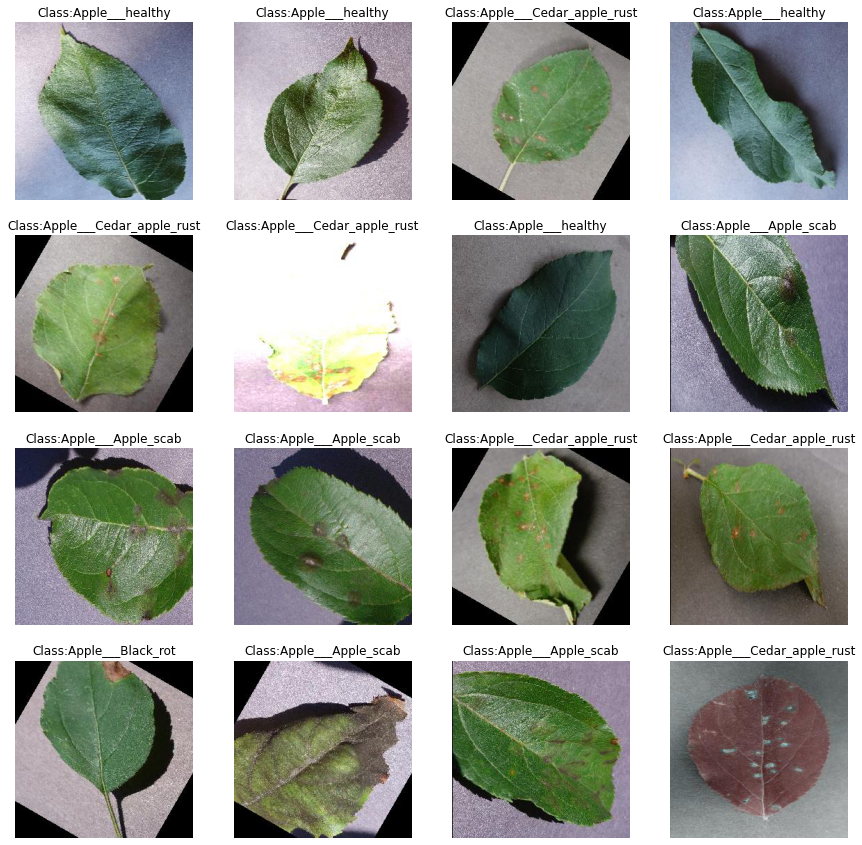

In [15]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_test.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_test,y_test)

***Loading train-set***

In [16]:
base_dir_train="input/Train"

In [17]:
class_labels=os.listdir(base_dir_train)
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [18]:
train_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_train, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(256,256))
            image=img_to_array(image)
            image=image/255.0
            train_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/Train\Apple___Apple_scab
input/Train\Apple___Black_rot
input/Train\Apple___Cedar_apple_rust
input/Train\Apple___healthy


In [19]:
print(len(train_data))

2411


In [20]:
x_train,Y_train =zip(*train_data)

In [21]:
x_train

(array([[[0.654902  , 0.6392157 , 0.76862746],
         [0.6509804 , 0.63529414, 0.7647059 ],
         [0.64705884, 0.6313726 , 0.7607843 ],
         ...,
         [0.7254902 , 0.7137255 , 0.827451  ],
         [0.7176471 , 0.7058824 , 0.81960785],
         [0.70980394, 0.69803923, 0.8117647 ]],
 
        [[0.6666667 , 0.6509804 , 0.78039217],
         [0.6627451 , 0.64705884, 0.7764706 ],
         [0.65882355, 0.6431373 , 0.77254903],
         ...,
         [0.7294118 , 0.7176471 , 0.83137256],
         [0.72156864, 0.70980394, 0.8235294 ],
         [0.7176471 , 0.7058824 , 0.81960785]],
 
        [[0.6666667 , 0.6509804 , 0.78039217],
         [0.6627451 , 0.64705884, 0.7764706 ],
         [0.65882355, 0.6431373 , 0.77254903],
         ...,
         [0.7372549 , 0.7254902 , 0.8392157 ],
         [0.7294118 , 0.7176471 , 0.83137256],
         [0.7254902 , 0.7137255 , 0.827451  ]],
 
        ...,
 
        [[0.39215687, 0.3529412 , 0.4862745 ],
         [0.4       , 0.36078432, 0.49411

In [22]:
print(Y_train)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
X_train=np.array(x_train)
y_train=np.array(Y_train)

In [ ]:
print(X_train.shape,y_train.shape)

(2411, 256, 256, 3) (2411,)


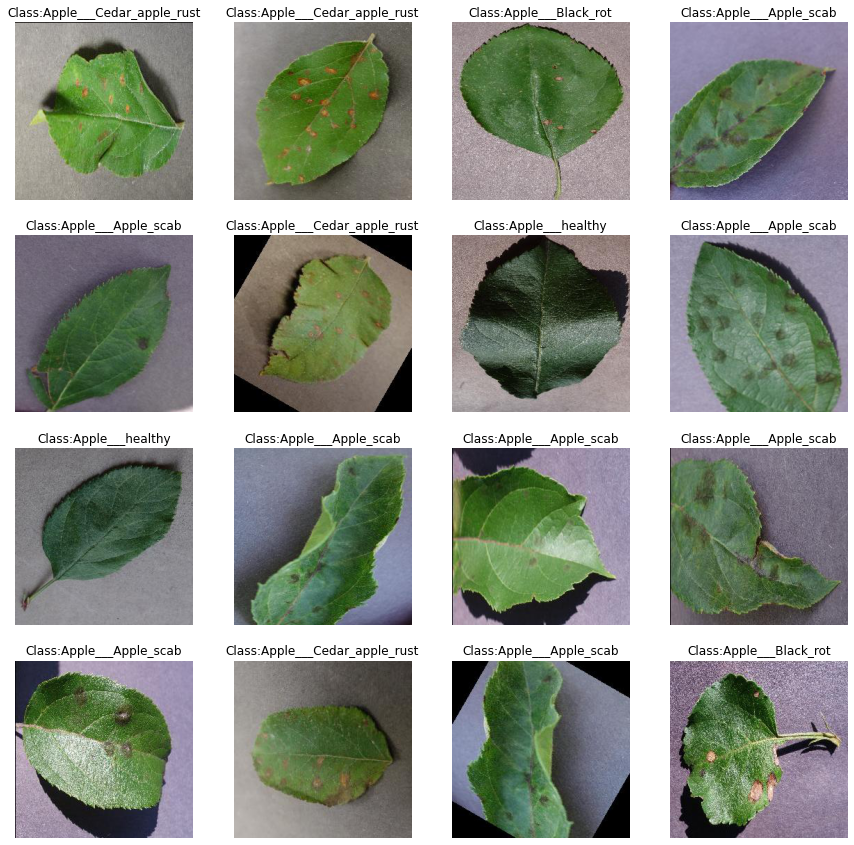

In [ ]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_train.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_train,y_train)

### Algorithm - ResNet152V2

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizerslegacy import Adam

In [ ]:
resnet_model=tf.keras.applications.resnet_v2.ResNet152V2(include_top=False,
                                                   weights="imagenet",
                                                   input_tensor=None,
                                                   input_shape=(256,256,3),
                                                   pooling="max",
                                                   classes=1000)
resnet_model.trainable = False

In [ ]:
inputs = resnet_model.input
m = tf.keras.layers.Dense(512, activation='relu')(resnet_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(m)
resnet_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=1e-3,decay=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 64, 64, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 64, 64, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 32, 32, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 34, 34, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_blo

                                                                  'conv3_block7_3_conv[0][0]']    
                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 32, 32, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 32, 32, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 32, 32, 128)  65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
          

 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 18, 18, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_preact_bn (BatchN  (None, 16, 16, 1024  4096       ['conv4_block4_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 16, 16, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block7_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block10_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block10_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_pad (ZeroPaddi  (None, 18, 18, 256)  0          ['conv4_block10_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 16, 16, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 16, 16, 1024  4096       ['conv4_block12_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_blo

 conv4_block15_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 18, 18, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block18_preact_bn (Batch  (None, 16, 16, 1024  4096       ['conv4_block17_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 16, 16, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block18_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_blo

 conv4_block20_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block20_2_pad[0][0]']    
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block20_2_relu[0][0]']   
                                )                                                                 
          

                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block23_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 on)                                                                                              
                                                                                                  
 conv4_block25_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 16, 16, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_block26_preact_bn (Batch  (None, 16, 16, 1024  4096       ['conv4_block25_out[0][0]']      
 Normalization)                 )                                                                 
          

                                                                                                  
 conv4_block28_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 18, 18, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block28_2_pad[0][0]']    
                                                                                                  
 conv4_block28_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block28_2_conv[0][0]']   
 lization)

                                )                                 'conv4_block30_3_conv[0][0]']   
                                                                                                  
 conv4_block31_preact_bn (Batch  (None, 16, 16, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 16, 16, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block31_preact_relu[0][0]
                                                                 ']                               
          

                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 16, 16, 256)  589824      ['conv4_block33_2_pad[0][0]']    
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block33_2_relu[0][0]']   
          

 ivation)                       )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 16, 16, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
          

 conv5_block2_2_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 8, 8, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 8, 8, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
          

In [ ]:
history = resnet_model.fit(X_train, y_train, batch_size=64,validation_data = (X_test, y_test),epochs=10)

Epoch 1/10
38/38 [==============================] - 958s 25s/step - loss: 7.6930 - accuracy: 0.6599 - val_loss: 0.3745 - val_accuracy: 0.9020
Epoch 2/10
38/38 [==============================] - 938s 25s/step - loss: 0.1830 - accuracy: 0.9419 - val_loss: 0.2171 - val_accuracy: 0.9300
Epoch 3/10
38/38 [==============================] - 976s 26s/step - loss: 0.0630 - accuracy: 0.9772 - val_loss: 0.2097 - val_accuracy: 0.9340
Epoch 4/10
38/38 [==============================] - 1004s 27s/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.1538 - val_accuracy: 0.9460
Epoch 5/10
38/38 [==============================] - 980s 26s/step - loss: 0.0148 - accuracy: 0.9975 - val_loss: 0.1550 - val_accuracy: 0.9440
Epoch 6/10
38/38 [==============================] - 940s 25s/step - loss: 0.0111 - accuracy: 0.9988 - val_loss: 0.1495 - val_accuracy: 0.9520
Epoch 7/10
38/38 [==============================] - 940s 25s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1352 - val_accuracy: 0.9520
Epoch

### Accuracy and Loss plot-graphs

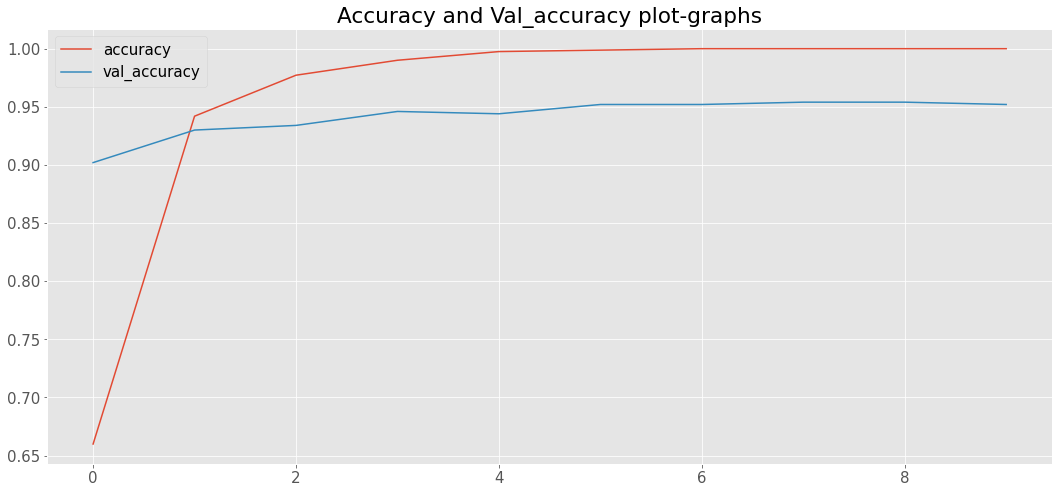

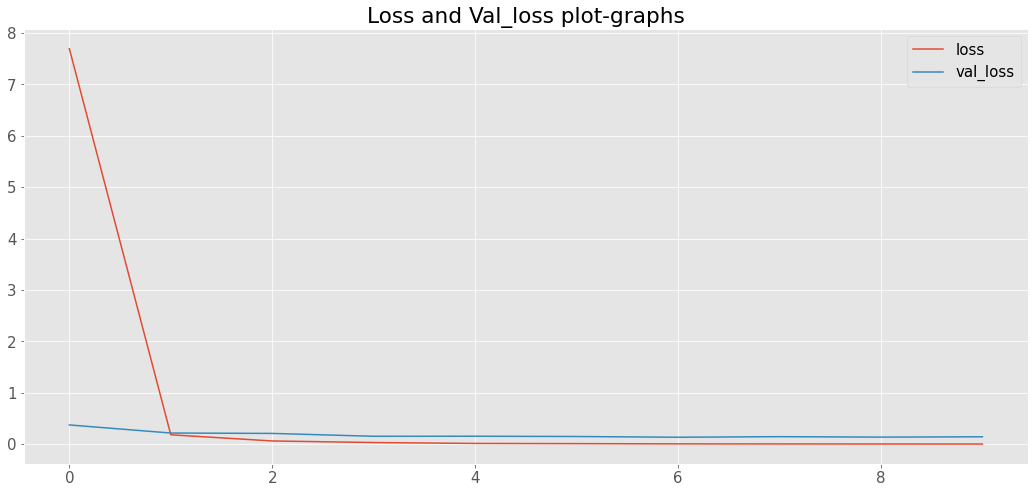

In [ ]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=15
    plt.plot(history.history["accuracy"],label="accuracy")
    plt.plot(history.history["val_accuracy"],label="val_accuracy")
    plt.title(label="Accuracy and Val_accuracy plot-graphs")
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.title(label="Loss and Val_loss plot-graphs")
    plt.legend()
    plt.show()

In [ ]:
resnet_model_prediction=resnet_model.predict(X_test,batch_size=64,verbose=1)

8/8 [==============================] - 164s 20s/step


In [ ]:
print(resnet_model_prediction)

[[9.99998093e-01 1.88024262e-06 1.47021685e-12 5.57801583e-09]
 [9.99433458e-01 5.62473026e-04 2.66197253e-06 1.47307014e-06]
 [9.99999762e-01 2.10304293e-07 2.49617740e-11 4.30436806e-12]
 ...
 [5.99207888e-05 8.59537522e-06 2.45807483e-03 9.97473419e-01]
 [8.30603881e-07 1.39740441e-08 2.02907291e-09 9.99999166e-01]
 [8.28035918e-05 5.80484882e-10 1.14137144e-10 9.99917150e-01]]


In [ ]:
resnet_model_labels=[]
for i in range(len(resnet_model_prediction)):
    resnet_model_labels.append(np.argmax(resnet_model_prediction[i]))

In [ ]:
print(resnet_model_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
true_labels=[]
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

In [ ]:
print(true_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

### Result Analysis

***Accuracy Score***

In [ ]:
resnet_accuracy=accuracy_score(y_true=true_labels,y_pred=resnet_model_labels)
print("ResNet152V2 model's validated accuracy is {:.2f}%".format(resnet_accuracy*100.0))

ResNet152V2 model's validated accuracy is 95.20%


***Classification Report***

In [ ]:
print(classification_report(y_true=true_labels,y_pred=resnet_model_labels,target_names=class_labels))

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.91      0.98      0.95       125
       Apple___Black_rot       0.94      0.94      0.94       125
Apple___Cedar_apple_rust       0.98      0.94      0.96       125
         Apple___healthy       0.97      0.94      0.96       125

                accuracy                           0.95       500
               macro avg       0.95      0.95      0.95       500
            weighted avg       0.95      0.95      0.95       500



***Confusion Matrix***

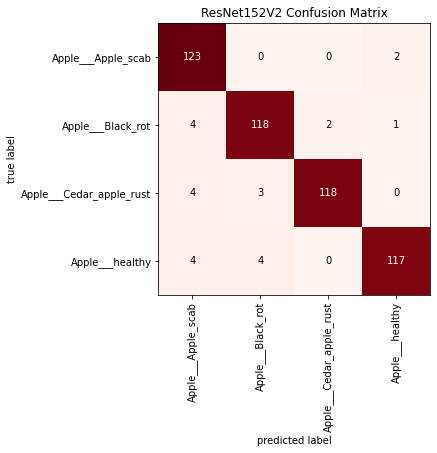

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=resnet_model_labels),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Reds)
plt.title(label="ResNet152V2 Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

***Model Saving***

In [ ]:
resnet_model.save(filepath="models/ResNet152V2_model.h5")

## Thank You